In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 加载数据

In [2]:
# 加载数据
data = pd.read_csv(filepath_or_buffer='./train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 数据清洗 - 去重/异常/空值

In [6]:
# 检查有没有id重复的
data.duplicated(["PassengerId"]).sum()

np.int64(0)

In [7]:
# 检查Nan的有多少，是哪些feature
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
type(data["Age"].mean())

numpy.float64

In [9]:
data["Age"].fillna(value=data["Age"].mean().astype(int), inplace=True)

C:\Users\63447\AppData\Local\Temp\ipykernel_43332\3782661866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(value=data["Age"].mean().astype(int), inplace=True)


In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 编码

In [11]:
# 对sex进行编码
sex_dict = {Sex:idx for idx, Sex in enumerate(data["Sex"].unique())}
print(sex_dict)
# 更新对应的列
data["Sex"] = data["Sex"].apply(func=lambda ele: sex_dict[ele])

{'male': 0, 'female': 1}


### 确定features, labels

In [12]:
X = data[["Pclass", "Sex", "Age"]]
y = data["Survived"]

### 切割数据

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [14]:
y_test.shape

(179,)

### 实例化决策树

In [15]:
dtc = DecisionTreeClassifier()

In [16]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

### 训练模型

In [17]:
dtc.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

[Text(0.4792681071211199, 0.9705882352941176, 'x[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.1563451004260499, 0.9117647058823529, 'x[2] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(0.3178066037735849, 0.9411764705882353, 'True  '),
 Text(0.029214850882531954, 0.8529411764705882, 'x[0] <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7.0, 15.0]'),
 Text(0.019476567255021303, 0.7941176470588235, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.038953134510042606, 0.7941176470588235, 'x[2] <= 2.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(0.019476567255021303, 0.7352941176470589, 'x[2] <= 0.71\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.009738283627510651, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.029214850882531954, 0.6764705882352942, 'x[2] <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.019476567255021303, 0.6176470588235294, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.

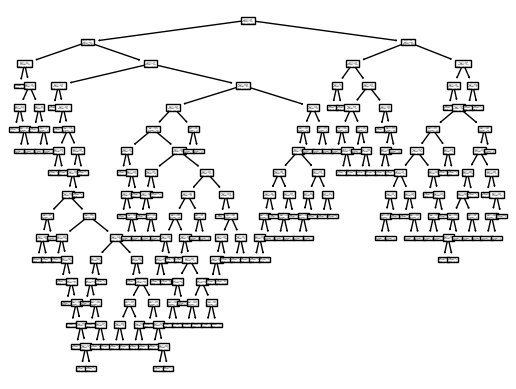

In [18]:
plot_tree(dtc)

In [19]:
dtc.feature_importances_

array([0.21336784, 0.45628498, 0.33034718])

### 预测

In [20]:
y_pred = dtc.predict(X=X_test)

### 评估模型

In [21]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(acc)

0.7932960893854749
